# Assignment No:3
Image and Video Prosessing 
Name : Ajinkya Waghulikar 
Neptun : FGRQTC 
Question : Detection of circular object by edge detection and Hough transform for circles
Input: 1. image containing circular objects, e.g., cells; 2. range of diameters. 
Output: 1. accumulator image; 2. input image with objects detected in given range of diameters.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
from collections import defaultdict

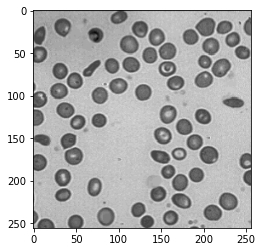

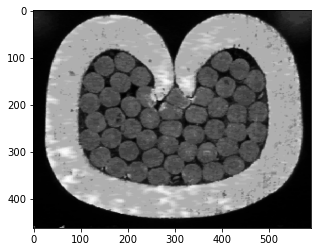

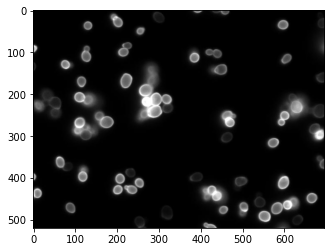

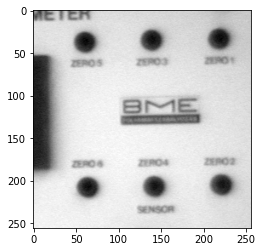

In [2]:
img = cv2.imread("blood.png", 0)
img1 = cv2.imread("cable.png", 0)
img2= cv2.imread("cells.png", 0)
img3= cv2.imread("circles.png", 0)

plt.imshow(img, cmap='gray')
plt.show()
plt.imshow(img1, cmap='gray')
plt.show()
plt.imshow(img2, cmap='gray')
plt.show()
plt.imshow(img3, cmap='gray')
plt.show()

In [3]:
def circular_detection ( image , diameterRange ) :


    radiusRange = [ int ( elem / 2 ) for elem in diameterRange ]
    rangeMin = radiusRange [ 0 ]
    rangeMax =  radiusRange [ 1 ]
    row , column = image.shape

    accumulatorMatrix = np.zeros ( [ 2 * row , 2 * column , rangeMax + 1 ] )
    for r in radiusRange :
        for x in range ( row ) :
            for y in range ( column ) :
                if image [ x ] [ y ] != 0 :
                    for theta in range ( 0 , 360 ) :
                        b = y - r * np.sin ( theta * math.pi / 180 )
                        a = x - r * np.cos ( theta * math.pi / 180 )
                        accumulatorMatrix [ int ( a ) , int ( b ) , int ( r ) ] += 1  # voting

    accumulatorMatrix_ = np.sum ( accumulatorMatrix , axis = 2 )
    accumulatorMatrix_ = ( ( accumulatorMatrix_ - accumulatorMatrix_.min() ) *
                           ( 1.0 / (accumulatorMatrix_.max() - accumulatorMatrix_.min() ) * 255 ) ) # normalization

    accumulatorImage = accumulatorMatrix_ [ : row + 1 , : column + 1 ]
    max_value = np.max ( accumulatorMatrix )
    indices = np.argwhere ( accumulatorMatrix > ( max_value * 0.7 ) )

    return indices, accumulatorImage

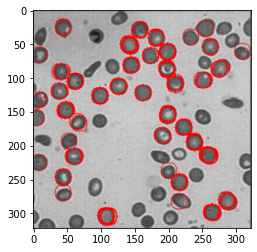

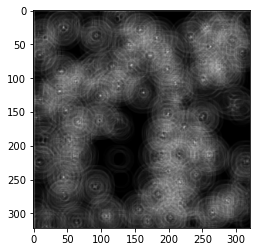

In [4]:
edgeDetected = cv2.Canny ( img , 50 , 150 )
indices, accumulatorImage = circular_detection( edgeDetected , [ 15 , 25 ] ) # circles 15-25
for x , y , r in indices :
    cv2.circle ( img , ( y , x ) , r , (0 , 0 , 255) , thickness = 1 , lineType = 8 , shift = 0 )

    
plt.imshow(img, cmap='gray')
plt.show()
plt.imshow(accumulatorImage.astype ( np.uint8 ), cmap='gray')
plt.show()

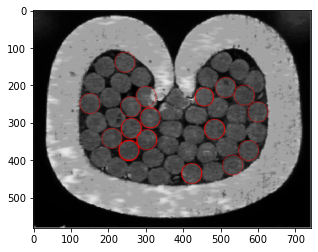

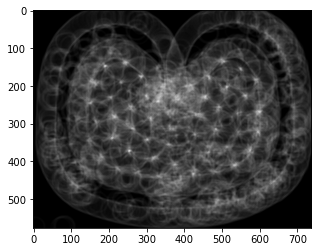

In [5]:
edgeDetected = cv2.Canny ( img1 , 50 , 150 )
indices, accumulatorImage = circular_detection( edgeDetected , [ 15 , 25 ] ) # circles 15-25
for x , y , r in indices :
    cv2.circle ( img1 , ( y , x ) , r , (0 , 0 , 255) , thickness = 1 , lineType = 8 , shift = 0 )

    
plt.imshow(img1, cmap='gray')
plt.show()
plt.imshow(accumulatorImage.astype ( np.uint8 ), cmap='gray')
plt.show()

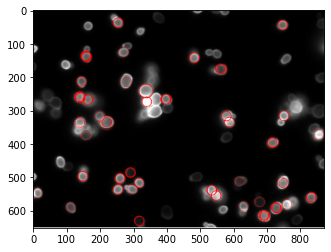

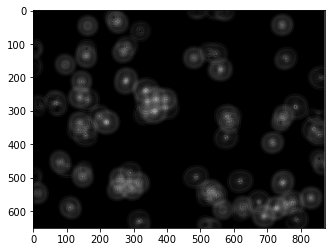

In [6]:
edgeDetected = cv2.Canny ( img2 , 50 , 150 )
indices, accumulatorImage = circular_detection( edgeDetected , [ 15 , 25 ] ) # circles 15-25
for x , y , r in indices :
    cv2.circle ( img2 , ( y , x ) , r , (0 , 0 , 255) , thickness = 1 , lineType = 8 , shift = 0 )

    
plt.imshow(img2, cmap='gray')
plt.show()
plt.imshow(accumulatorImage.astype ( np.uint8 ), cmap='gray')
plt.show()

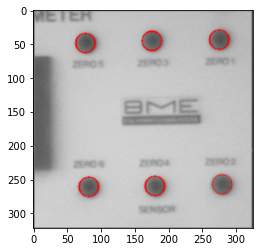

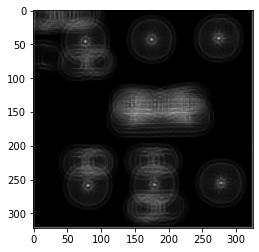

In [7]:
edgeDetected = cv2.Canny ( img3 , 50 , 150 )
indices, accumulatorImage = circular_detection( edgeDetected , [ 15 , 25 ] ) # circles 15-25
for x , y , r in indices :
    cv2.circle ( img3 , ( y , x ) , r , (0 , 0 , 255) , thickness = 1 , lineType = 8 , shift = 0 )

    
plt.imshow(img3, cmap='gray')
plt.show()
plt.imshow(accumulatorImage.astype ( np.uint8 ), cmap='gray')
plt.show()